# Netflix Dataset

Importando Numpy y Pandas

In [37]:
import numpy as np
import pandas as pd

Cargando el conjunto de datos en un DataFrame de Pandas

In [58]:
df_netflix = pd.read_csv('C:/Users/Javier Valdés/Downloads/netflix.csv',encoding='latin-1')

In [59]:
# Mostrar las primeras filas del DataFrame para verificar la carga exitosa
df_netflix.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,...,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [62]:
# Vamos a eliminar las columnas que no aportan información
columnas_a_eliminar = ['Unnamed: 12', 'Unnamed: 13', 'Unnamed: 14','Unnamed: 15', 'Unnamed: 16', 'Unnamed: 17','Unnamed: 18', 'Unnamed: 19', 'Unnamed: 20','Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23','Unnamed: 24', 'Unnamed: 25']
df_netflix_1 = df_netflix.drop(columns=columnas_a_eliminar)



In [64]:
# Primero, vamos a obtener información general del conjunto de datos, como el número de filas y columnas, así como los tipos de datos de cada columna.
# Esto nos dará una idea de la estructura del conjunto de datos y nos permitirá identificar cualquier problema potencial, como valores faltantes o tipos de datos incorrectos.

df_netflix_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8809 entries, 0 to 8808
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8809 non-null   object
 1   type          8809 non-null   object
 2   title         8809 non-null   object
 3   director      6175 non-null   object
 4   cast          7984 non-null   object
 5   country       7978 non-null   object
 6   date_added    8799 non-null   object
 7   release_year  8809 non-null   int64 
 8   rating        8805 non-null   object
 9   duration      8806 non-null   object
 10  listed_in     8809 non-null   object
 11  description   8809 non-null   object
dtypes: int64(1), object(11)
memory usage: 826.0+ KB


In [65]:
# Ahora, veamos algunas estadísticas descriptivas de las columnas numéricas del conjunto de datos.
# Esto nos proporcionará información como la media, la desviación estándar, el valor mínimo y máximo, y los cuartiles de las columnas numéricas, 
# lo que nos ayudará a entender mejor la distribución de los datos.
df_netflix_1.describe()

,release_year
count,8809.000000
mean,2014.181292
std,8.818932
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2024.000000


In [67]:
# Finalmente, verifiquemos si hay valores nulos en el conjunto de datos.
# Esto nos indicará si hay algún valor faltante en el conjunto de datos que necesitemos manejar antes de realizar análisis adicionales.
df_netflix_1.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

El siguiente es realizar un análisis exploratorio de datos (EDA) empecemos por visualizar la distribución de los años de lanzamiento de las películas y programas de televisión en nuestro conjunto de datos. Esto nos dará una idea de cómo se distribuyen las producciones a lo largo del tiempo.
Vamos a usar un histograma para visualizar esta distribución. Aquí está el código para hacerlo


In [73]:

import matplotlib.pyplot as plt

In [74]:
# Configurar el tamaño de la figura
plt.figure(figsize=(10, 6))

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

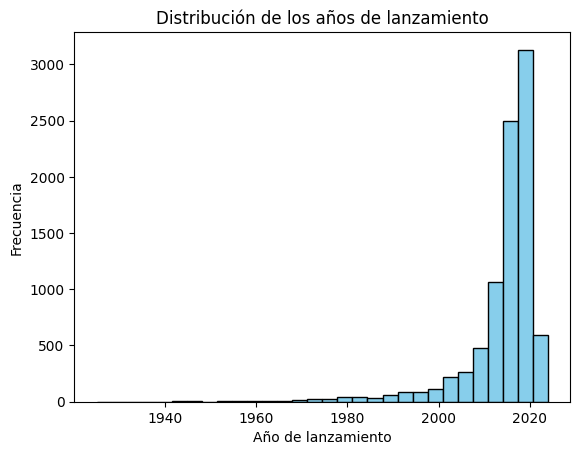

In [77]:
# Crear un histograma de los años de lanzamiento
plt.hist(df_netflix_1['release_year'], bins=30, color='skyblue', edgecolor='black')

# Agregar etiquetas y título
plt.xlabel('Año de lanzamiento')
plt.ylabel('Frecuencia')
plt.title('Distribución de los años de lanzamiento')

plt.show()

Perfecto. Ahora que hemos visualizado la distribución de los años de lanzamiento, podemos pasar a explorar otras áreas de interés
Vamos a continuar explorando las tendencias temporales en la cantidad de películas y programas de televisión agregados a Netflix. Esto nos ayudará a entender cómo ha evolucionado la oferta de contenido a lo largo del tiempo.

In [79]:
# Convertir la columna 'date_added' a formato datetime
df_netflix_1['date_added'] = pd.to_datetime(df_netflix_1['date_added'], format='%B %d, %Y', errors='coerce')

In [80]:
# Extraer el año de la columna 'date_added'
df_netflix_1['year_added'] = df_netflix_1['date_added'].dt.year

In [81]:
# Contar la cantidad de películas y programas de televisión agregados en cada año
movies_tv_shows_added = df_netflix_1.groupby('year_added').size()

In [82]:
# Configurar el tamaño de la figura
plt.figure(figsize=(10, 6))

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

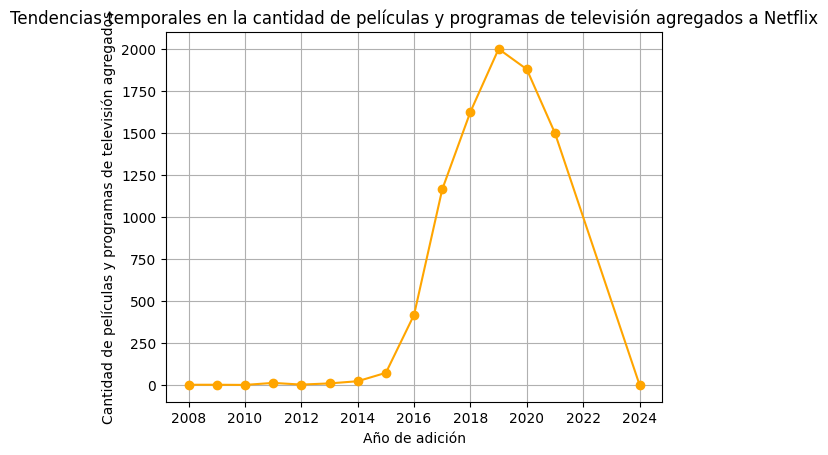

In [84]:
# Crear un gráfico de líneas de las tendencias temporales en la cantidad de películas y programas de televisión agregados
plt.plot(movies_tv_shows_added.index, movies_tv_shows_added.values, marker='o', color='orange')

# Agregar etiquetas y título
plt.xlabel('Año de adición')
plt.ylabel('Cantidad de películas y programas de televisión agregados')
plt.title('Tendencias temporales en la cantidad de películas y programas de televisión agregados a Netflix')

# Mostrar el gráfico
plt.grid(True)
plt.show()

Ahora que hemos explorado las tendencias temporales en la cantidad de películas y programas de televisión agregados a Netflix
Vamos a explorar las distribuciones de calificaciones (ratings) y géneros en nuestro conjunto de datos.
Comencemos por visualizar la distribución de calificaciones (ratings) en nuestro conjunto de datos utilizando un gráfico de barras.

In [85]:
# Contar la cantidad de películas y programas de televisión por calificación (rating)
rating_counts = df_netflix_1['rating'].value_counts()

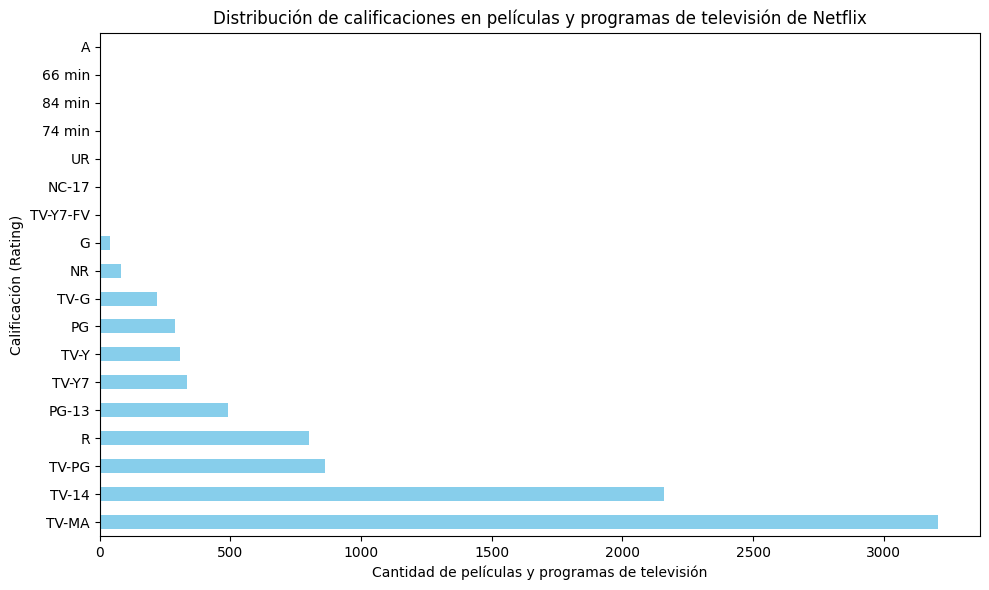

In [91]:
# Configurar el tamaño de la figura
plt.figure(figsize=(10, 6))

# Crear un gráfico de barras de la distribución de calificaciones
rating_counts.plot(kind='barh', color='skyblue')

# Agregar etiquetas y título
plt.xlabel('Cantidad de películas y programas de televisión')
plt.ylabel('Calificación (Rating)')
plt.title('Distribución de calificaciones en películas y programas de televisión de Netflix')

# Mostrar el gráfico
plt.tight_layout()
plt.show()

Otra área interesante para explorar es identificar los países con la mayor cantidad de producciones de Netflix. Esto nos dará una idea de dónde se están produciendo la mayoría de las películas y programas de televisión en nuestro conjunto de datos.

In [92]:
# Dividir las cadenas de texto en la columna 'country' y convertirlas en listas de países
countries_list = df_netflix_1['country'].str.split(', ')

In [93]:
# Crear una lista plana de todos los países
all_countries = [country for sublist in countries_list.dropna() for country in sublist]


In [94]:
# Contar la cantidad de producciones por país
from collections import Counter
country_counts = Counter(all_countries)

In [95]:
# Convertir el diccionario de conteos en un DataFrame para facilitar la visualización
country_counts_df = pd.DataFrame.from_dict(country_counts, orient='index', columns=['Cantidad'])
country_counts_df.index.name = 'País'

In [96]:
# Ordenar el DataFrame por cantidad en orden descendente
country_counts_df = country_counts_df.sort_values(by='Cantidad', ascending=False)

In [97]:
# Mostrar los primeros 10 países con la mayor cantidad de producciones
country_counts_df.head(10)

,Cantidad
País,
United States,3690
India,1046
United Kingdom,804
Canada,445
France,393
Japan,318
South Korea,232
Spain,232
Germany,226


<Figure size 1200x800 with 0 Axes>

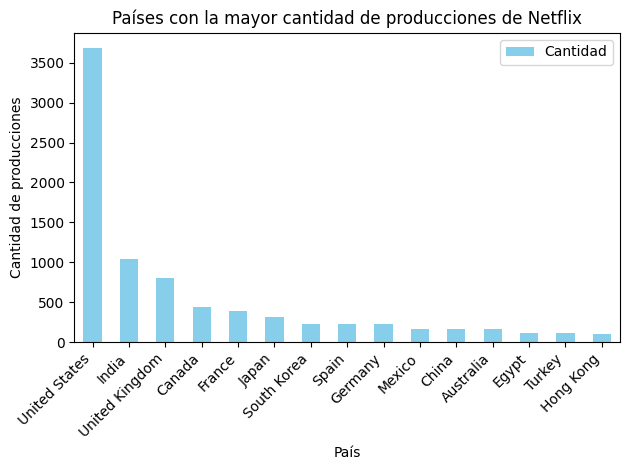

In [98]:
# Configurar el tamaño de la figura
plt.figure(figsize=(12, 8))

# Crear un gráfico de barras de la cantidad de producciones por país (solo mostraremos los 15 primeros países)
country_counts_df.head(15).plot(kind='bar', color='skyblue')

# Agregar etiquetas y título
plt.xlabel('País')
plt.ylabel('Cantidad de producciones')
plt.title('Países con la mayor cantidad de producciones de Netflix')

# Mostrar el gráfico
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()